## Assignment 4 

In this assignment i'm going to use the sklearn package to implement Classification and Clustering.

In [99]:
import pandas as pd 
import seaborn as seaborn
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift

data = pd.read_csv("listings.csv")

### Exercise 1)
I'm going to use sklearn to implement a naive bayes classifier, a Support Vector Machine (SVM) and KNN-classifier to classify apartments according to their latitude and longitude to a certain neighbourhood.
To test it i'm going to train it with 1000 randomly chosen apartments and i'm going to test it with another 1000 ones.

First the data is going to be divided with the function train_test_split into training and testing data. The testing size is here set to 1000.

In [38]:
y = data['neighbourhood_group']
X = data[['latitude', 'longitude']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=0)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20423,39968822,"Bright, sunshine white sophisticated",285303484,Ann,Horta-Guinardó,el Baix Guinardó,41.41177,2.16373,Entire home/apt,50,32,0,NaN,NaN,1,349
20424,39969034,"Fabulous, Modern Barcelona 2 Bedroom Apartment...",268096872,Allianz,Ciutat Vella,el Barri Gòtic,41.38576,2.17438,Entire home/apt,508,3,0,NaN,NaN,11,362
20425,39969285,Spectacular Luxurious 6 Bedroom Penthouse w/ P...,268096872,Allianz,Eixample,la Sagrada Família,41.40758,2.17242,Entire home/apt,1031,3,0,NaN,NaN,11,362
20426,39972885,Couples` Home with Parking,252088393,Joseph R.,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.39138,2.18240,Entire home/apt,89,3,0,NaN,NaN,1,22


Implementing a naive bayes classifier with GaussianNB(). We assume the predictors to have a gaussian distribution and are independent from each other.


In [19]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 142


Implementing a Support Vector Machine. 
This algorithm outputs an optimal hyperplane to categorize new examples.
It has a lot of tuning parameters to modify the model.

In [101]:
clf = svm.SVC()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 673


Implementing a KNN-classifier.

In [22]:
classifier = KNeighborsClassifier(n_neighbors=len(y.unique()))
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 18


The support vector machine classifies the worst. This could maybe be fixed by conducting a parameter tuning before fitting the model. The naive bayes classifier classified much better and the knn-classifier classified really good. 

### Exercise 2)
Now i'm going to clusterize the apartments according to their price and room type by K-means clustering and agglomerative clustering.

K-means clustering is trying to seperate the samples by identifying the centroids and then allocating every data point to the nearest cluster. In our case we want to clusterize by room type and price of the apartments. Room type is a categorical value which is why we have to transform it into a numerical value to be able to calculate the euclidean distance.

In [67]:
X = data[['price','room_type']]
# transform room_types into numbers from 1 to 4
X = X.replace(to_replace="Shared room", value=1).replace(to_replace="Private room", value=2).replace(to_replace="Hotel room", value=3).replace(to_replace="Entire home/apt", value=4)


#### Trying different numbers of clusters

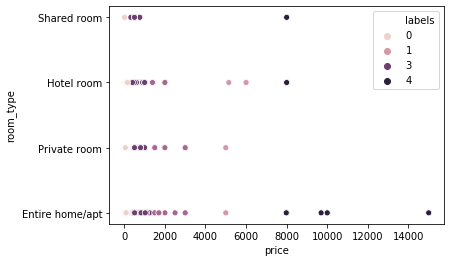

In [82]:
# trying with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
data["labels"]=labels

# plot the clusterization
seaborn.scatterplot(x="price",y="room_type", hue="labels", data=data)

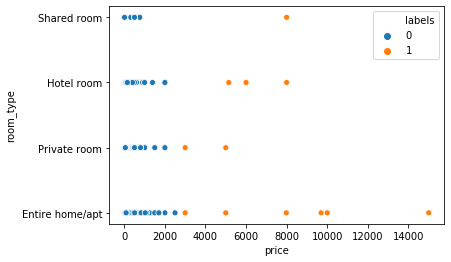

In [89]:
# trying 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
data["labels"]=labels

# plot the clusterization
seaborn.scatterplot(x="price",y="room_type", hue="labels", data=data)

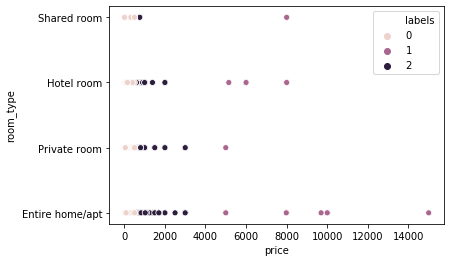

In [90]:
# trying 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
data["labels"]=labels

# plot the clusterization
seaborn.scatterplot(x="price",y="room_type", hue="labels", data=data)

As we can see the clustering depends more on the price than on the room_type. For all, 2, 3 and for 5 clusters the apartments are clustered by price (probably because room_type is a categorical variable).
In general we can see that the rooms with higher prices are entire homes as well as hotel rooms; private rooms and shared rooms are cheaper.


#### Plotting for different features

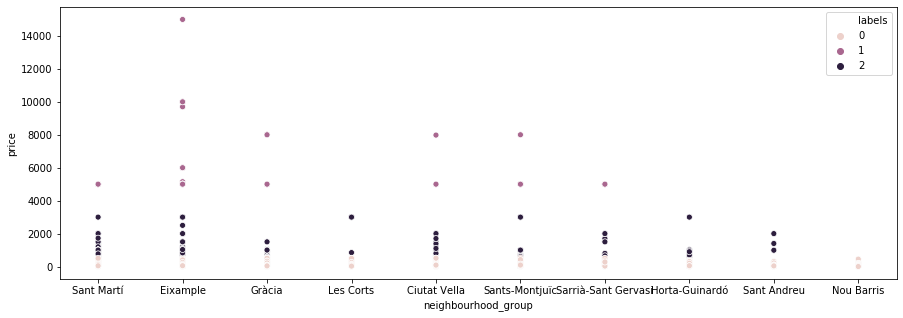

In [81]:
# plotting according to price and neighbourhood_group

# plot the clusterization
plt.figure(figsize=(15,5))
seaborn.scatterplot(x="neighbourhood_group",y="price", hue="labels", data=data)

Some neighbourhoods like Eixanple, Grácia, Ciutat Vella and Sants-Montjuic seem to have higher prices than other neighborhoods like Nou Barris, Sant Andreu or Les Corts. In these cheaper neighbourhoods we can find more apartments belonging to cluster with label "0". That tend to be more private rooms or shared rooms. More touristy areas like Eixanple, Grácia, Ciutat Vella apparently tend to have more hotel rooms, or whole apartments (labels "1" or "2").

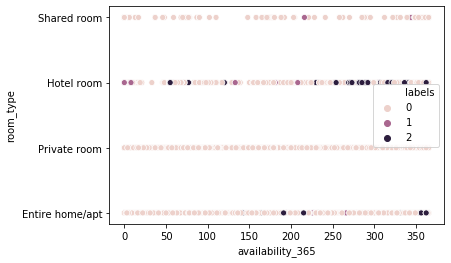

In [93]:
# plotting according to availability and room_type
seaborn.scatterplot(x="availability_365",y="room_type", hue="labels", data=data)

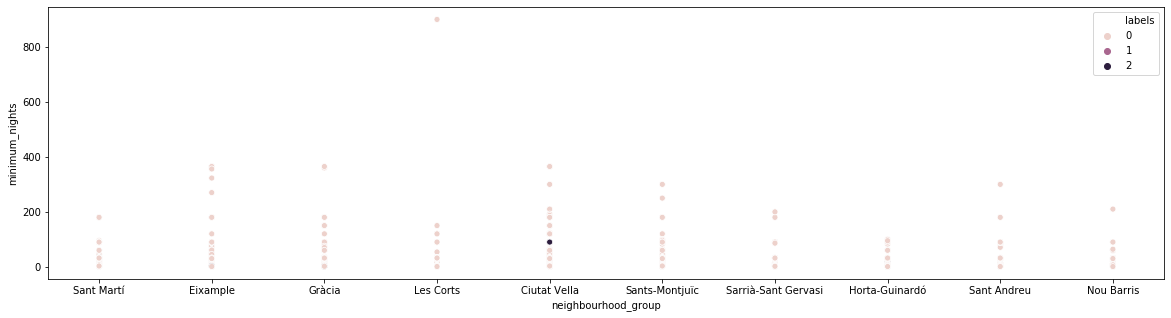

In [78]:
# plotting according to availability and room_type
plt.figure(figsize=(20,5))
seaborn.scatterplot(x="neighbourhood_group",y="minimum_nights", hue="labels", data=data)

Apparently we almost just find minimum nights for apartments from cluster with label "0" which are as we saw before mostly shared flats and private rooms. Apparently we don't find minimum night data for the other room types.

#### Clustering with Agglomerative Clustering 
In agglomerative Clustering the pair of clusters that minimally increases a given linkage distance is recursively merged

In [96]:
clustering = AgglomerativeClustering().fit(X)
clustering

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

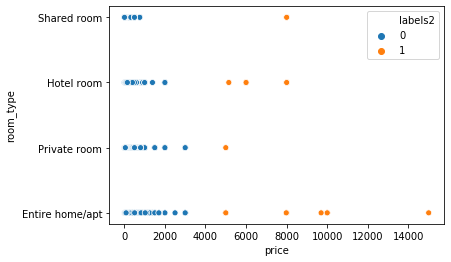

In [98]:
data["labels2"]=clustering.labels_
# plot the clusterization
seaborn.scatterplot(x="price",y="room_type", hue="labels2", data=data)

The clustering with agglomerative clustering chooses two clusters and looks really similar to the clusterization of k-means for two clusters.